## 1日の中で時間ごとの歩数の遷移をモデル化する

In [98]:
%matplotlib inline
import random
import numpy
import matplotlib.pylab as plt

### 杉山先生がランダム9人の10日間の歩数を時間ごとに出してはった

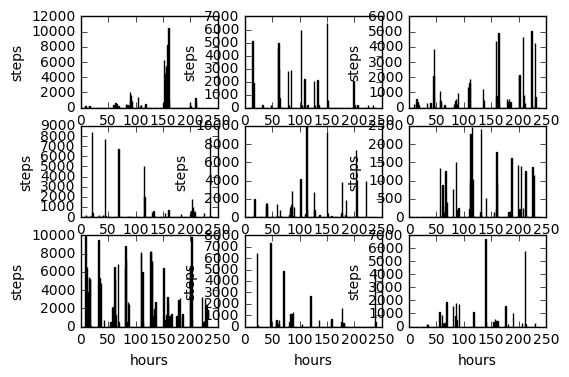

In [82]:
f = open('datasets.npz', 'rb')
dataset = numpy.load(f)
X = dataset['all']

f, axes = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        datasets = X[random.randint(0, X.shape[0] - 1)]
        # print 'dataset: ', dataset
        axes[i][j].bar(xrange(240), datasets)
        axes[i][j].set_xlabel('hours')
        axes[i][j].set_ylabel('steps')
plt.show()

### 1日の中で1時間ごとの歩数のヒストグラムを作成

In [239]:
#print X.shape
#daily_steps = X
daily_step = X
#print daily_step.shape
daily_steps = daily_step[daily_step != 0.0]
#daily_steps.reshape(-1,)
#numpy.ravel(daily_steps)
#print daily_steps.shape

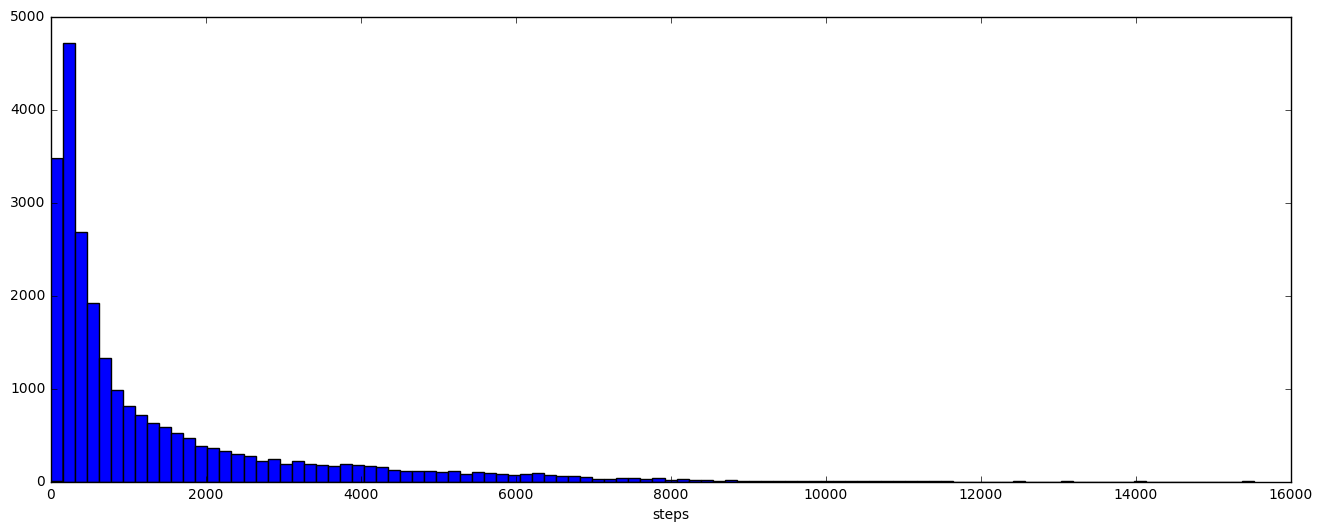

In [240]:
plt.figure(figsize=(16,6))
plt.hist(daily_steps, bins=100)
plt.xlabel('steps')
#plt.xticks([156, 495, 1008, 1717, 2742, 4030, 5609, 8166])
plt.show()

In [241]:
print numpy.max(daily_steps)

15520.7


### 歩数を人の状態として捉えるためにK-meansでクラスタリング

In [259]:
import scipy.cluster

#daily_step_1d = daily_step.reshape((-1, ))
#print daily_step_1d.shape
#とりあえずk=8でやる
codebook, destortion = scipy.cluster.vq.kmeans(daily_steps, 8)
#ちなみに16クラスタ、32クラスタでもクラスタリング可能っぽい
#codebook, destortion = scipy.cluster.vq.kmeans(daily_step_1d, 8)
codebook = numpy.sort(codebook)
print codebook

#code, dist = scipy.cluster.vq.vq(daily_step_1d, codebook)
#print code, dist

[  169.5110321    516.34631348  1042.81225586  1764.87023926  2781.57128906
  4125.56982422  5893.31738281  8421.71289062]


In [260]:
import collections

code, dist = scipy.cluster.vq.vq(daily_steps, codebook)
print collections.Counter(code)

Counter({0: 8870, 1: 5272, 2: 3145, 3: 2500, 4: 1787, 5: 1478, 6: 1063, 7: 362})


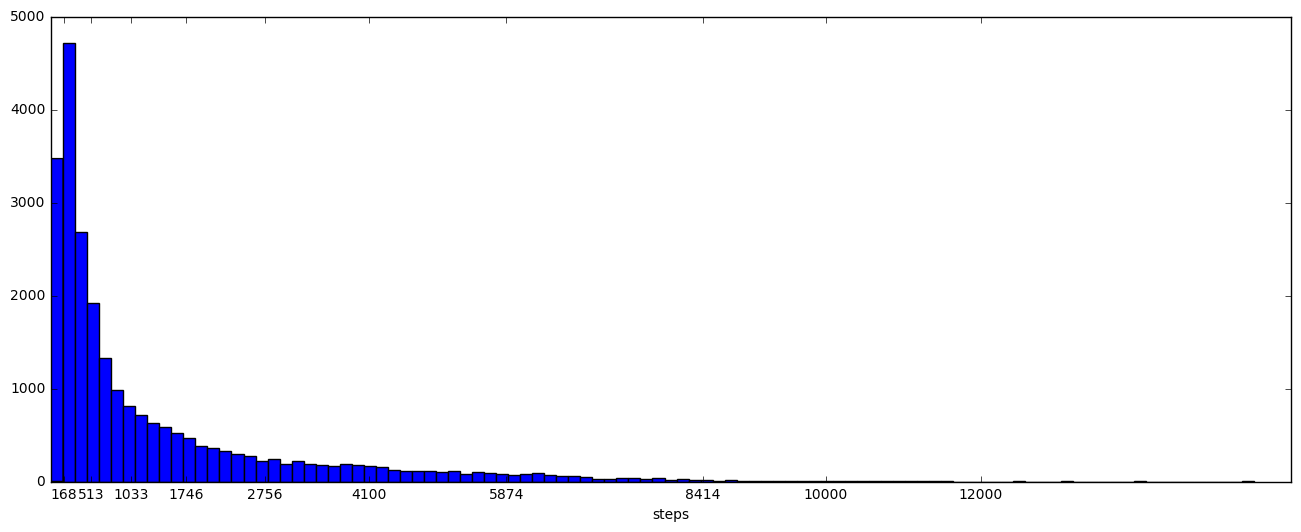

In [243]:
plt.figure(figsize=(16,6))
plt.hist(daily_steps, bins=100)
plt.xlabel('steps')
plt.xticks([168, 513, 1033, 1746, 2756, 4100, 5874, 8414, 10000, 12000])
plt.show()

### 1日8000歩達成した人と未完の人を分けて１日のクラスタ遷移を見る

In [227]:
#まず1日8000歩達成した人としていない人を分けよう
kampo_daily = numpy.zeros((0, 24))
mikan_daily = numpy.zeros((0, 24))

for step in daily_step:
    if numpy.sum(step) >= 8000:
        kampo_daily = numpy.vstack((kampo_daily, step))
        
    else:
        mikan_daily = numpy.vstack((mikan_daily, step))

(142, 24)
(562, 24)


In [238]:
kampo_tra = numpy.zeros((0, 24))
mikan_tra = numpy.zeros((0, 24))

#1日8000歩以上歩いた人
for name in kampo_daily:
    code, dist = scipy.cluster.vq.vq(name, codebook)
    kampo_tra = numpy.vstack((kampo_tra, code))
    
for name in mikan_daily:
    code, dist = scipy.cluster.vq.vq(name, codebook)
    mikan_tra = numpy.vstack((mikan_tra, code))
    
print "kampo user: "
for i in range(3):
    print kampo_tra[random.randint(0, kampo_tra.shape[0] - 1)]

print "mikan user: "
for i in range(3):
    print mikan_tra[random.randint(0, mikan_tra.shape[0] - 1)]

kampo user: 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  7.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  3.  0.  0.  0.  6.
  0.  0.  5.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  6.  6.  1.  0.  0.]
mikan user: 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.]


### 次は数個だけのデータでどのモデルに行きそうか推定する

In [ ]:
#とりあえず達成組から1個データ持ってこよう
x = kampo_tra[:1, :]

